Key Steps in the Code:
Load and preprocess the Titanic dataset: Clean and scale the dataset.
Logistic Regression Model: Implement a logistic regression model and define the binary cross-entropy loss function.
Optimization using BFGS: Use the minimize function with the BFGS method to optimize the weights of the logistic regression model.
Evaluation: Evaluate the model's performance on the test set and plot the loss function over the epochs.

In [1]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from scipy.optimize import minimize

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement the Logistic Regression model with BFGS optimization
class LogisticRegressionBFGS:
    def __init__(self):
        """Initialize Logistic Regression model parameters."""
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, params, X, y):
        """
        Compute the binary cross-entropy loss function.
        params: [weights, bias] 
        X: input features
        y: target labels
        """
        n_samples = X.shape[0]
        weights = params[:-1]
        bias = params[-1]
        
        z = np.dot(X, weights) + bias
        predictions = self.sigmoid(z)
        
        # Binary cross-entropy loss
        loss = - (1/n_samples) * np.sum(y * np.log(predictions + 1e-8) + (1 - y) * np.log(1 - predictions + 1e-8))
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using the BFGS optimization method.
        """
        # Initial guess for weights and bias
        initial_params = np.zeros(X.shape[1] + 1)  # [weights, bias]
        
        # Minimize the loss function using BFGS
        result = minimize(self.compute_loss, initial_params, args=(X, y), method='BFGS', options={'disp': True})
        
        # Extract the optimized parameters
        self.weights = result.x[:-1]
        self.bias = result.x[-1]
        
        print(f"Optimization Result: {result}")

    def predict(self, X):
        """
        Predict binary labels using the learned weights and bias.
        """
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model using BFGS optimization and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the Logistic Regression model using BFGS
    model = LogisticRegressionBFGS()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and log loss on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Calculate Log Loss
    z = np.dot(X_test, model.weights) + model.bias
    predictions = model.sigmoid(z)
    logloss = log_loss(y_test, predictions)
    print(f"Log Loss on test set: {logloss:.4f}")
    
    # Plot the loss over epochs for visualization (if applicable)
    # In this case, we're using scipy's minimize method with BFGS, so plotting the loss during optimization isn't straightforward.
    # However, BFGS outputs an optimization result that includes information like the number of iterations.

# Step 4: Run the training and evaluation function
train_and_evaluate()


Optimization terminated successfully.
         Current function value: 0.424912
         Iterations: 26
         Function evaluations: 216
         Gradient evaluations: 27
Optimization Result:   message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.42491229261715835
        x: [-9.455e-01  1.385e+00 -5.627e-01 -4.983e-01 -1.234e-01
             1.891e-01 -6.799e-01]
      nit: 26
      jac: [-4.865e-06  5.472e-06  5.402e-06 -3.885e-06 -5.387e-06
            -1.647e-06  9.093e-06]
 hess_inv: [[ 1.153e+01 -1.320e+00 ...  5.512e+00  1.546e+00]
            [-1.320e+00  6.895e+00 ...  3.151e-01 -2.617e+00]
            ...
            [ 5.512e+00  3.151e-01 ...  1.100e+01  1.142e+00]
            [ 1.546e+00 -2.617e+00 ...  1.142e+00  3.061e+00]]
     nfev: 216
     njev: 27

Accuracy on test set: 0.7472
Log Loss on test set: 0.5050


Explanation of the Code:
Data Preprocessing:

Loads the Titanic dataset and preprocesses it by converting categorical variables (like 'Sex') into numeric values and scaling the features using StandardScaler.
Logistic Regression with BFGS:

The LogisticRegressionBFGS class defines a logistic regression model where the compute_loss function calculates the binary cross-entropy loss.
The minimize function from scipy.optimize is used to minimize the loss function using the BFGS method.
The weights and bias are optimized to minimize the binary cross-entropy loss.
Training and Evaluation:

The train_and_evaluate function trains the model on the training set and evaluates its performance on the test set by calculating both accuracy and log loss.
The accuracy on the test set is printed, along with the log loss.

# Expected Output:
The Optimization result from the BFGS method will be displayed.
Accuracy on the test set will be printed.
Log Loss on the test set will be calculated.
Since BFGS does not directly track loss over epochs like batch gradient descent, the optimization result will include information about the optimization process.

# lasso loss function on above dataset with plots

Epoch 0, Loss: 0.6926
Epoch 100, Loss: 0.6651
Epoch 200, Loss: 0.6496
Epoch 300, Loss: 0.6407
Epoch 400, Loss: 0.6351
Epoch 500, Loss: 0.6315
Epoch 600, Loss: 0.6294
Epoch 700, Loss: 0.6282
Epoch 800, Loss: 0.6273
Epoch 900, Loss: 0.6268

Accuracy on test set: 0.7416


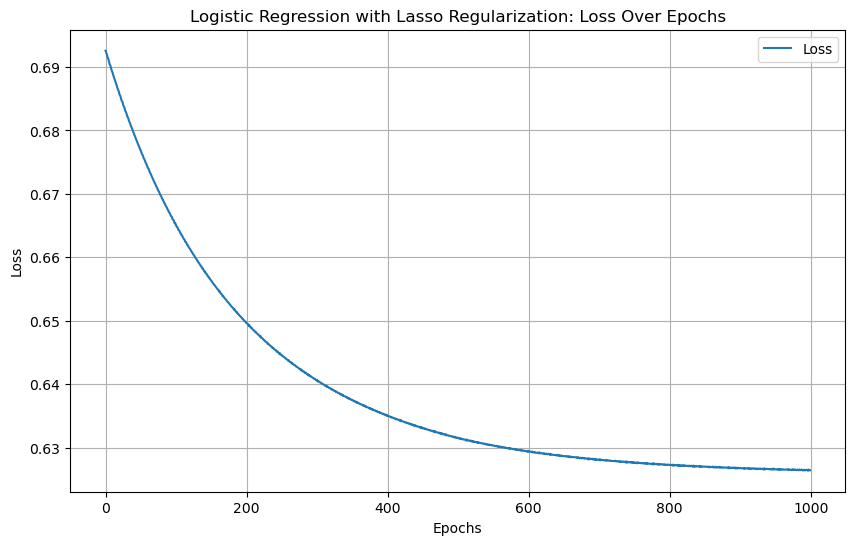

In [2]:
# Vaishnav Nigade
# Roll No: 2022BCD0045

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Step 1: Load and preprocess the Titanic dataset
def load_and_preprocess_data():
    """
    Load the Titanic dataset, preprocess it by converting categorical variables to numerical,
    and standardize the features for better optimization.
    """
    # Load the dataset
    df = pd.read_csv('titanic.csv')
    
    # Drop the 'Name' column as it's not relevant for prediction
    df.drop(columns=['Name'], inplace=True)
    
    # Convert 'Sex' column to numerical values: male -> 0, female -> 1
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Extract features (X) and target (y)
    X = df.drop(columns=['Survived']).values
    y = df['Survived'].values
    
    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

# Step 2: Implement Logistic Regression with Lasso Regularization
class LogisticRegressionLasso:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_reg=0.1):
        """
        Initialize the Logistic Regression model with hyperparameters.
        - learning_rate: The step size for gradient descent.
        - epochs: The number of iterations over the dataset.
        - lambda_reg: The regularization strength (Lasso penalty term).
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg = lambda_reg
        self.losses = []  # Store the loss over epochs

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, X, y, weights):
        """
        Compute Binary Cross-Entropy Loss with Lasso regularization.
        """
        z = np.dot(X, weights)
        predictions = self.sigmoid(z)
        # Compute the binary cross-entropy loss with Lasso regularization
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + self.lambda_reg * np.sum(np.abs(weights))
        return loss

    def fit(self, X, y):
        """
        Train the Logistic Regression model using Gradient Descent with Lasso regularization.
        - X: Feature matrix (training data)
        - y: Target vector (labels)
        """
        # Initialize weights
        weights = np.zeros(X.shape[1])
        
        # Gradient Descent loop
        for epoch in range(self.epochs):
            # Calculate predictions
            z = np.dot(X, weights)
            predictions = self.sigmoid(z)
            
            # Compute the gradients
            error = predictions - y
            dw = np.dot(X.T, error) / len(y)  # Gradient with respect to weights
            
            # Add the Lasso regularization term to the gradient
            dw += self.lambda_reg * np.sign(weights)
            
            # Update the weights using gradient descent
            weights -= self.learning_rate * dw
            
            # Compute and store the loss
            loss = self.compute_loss(X, y, weights)
            self.losses.append(loss)
            
            # Print loss every 100 epochs for monitoring
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        self.weights = weights

    def predict(self, X):
        """
        Predict binary labels for the given input data.
        """
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

# Step 3: Train the model and evaluate its performance
def train_and_evaluate():
    """
    Train the Logistic Regression model with Lasso regularization and evaluate its performance.
    """
    # Load and preprocess the dataset
    X, y = load_and_preprocess_data()
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the model with Lasso regularization
    model = LogisticRegressionLasso(learning_rate=0.01, epochs=1000, lambda_reg=0.1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy on test set: {accuracy:.4f}")
    
    # Plot the loss over epochs to visualize convergence
    plt.figure(figsize=(10, 6))
    plt.plot(model.losses, label='Loss')
    plt.title("Logistic Regression with Lasso Regularization: Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 4: Run the training and evaluation function
train_and_evaluate()


Explanation of the Code:

1. Data Preprocessing:

. The Titanic dataset is loaded and preprocessed. The Sex column is
converted to a numerical format (male = 0, female = 1), and the
dataset is standardized using standardScaler

2. Logistic Regression with Lasso Regularization:

. The LogisticRegressionLasso class implements gradient descent for
logistic regression with Lasso regularization.

· The Lasso regularization term (sum of absolute values of the weights)
is added to the loss function to shrink the less important coefficients.

3. Training and Evaluation:

. The model is trained using the training set, and the loss is calculated
and stored at each epoch.

. The accuracy of the model is calculated on the test set.

· A plot showing the loss over epochs is generated to visualize the
training.

converaence of the
e model "rin